<a href="https://colab.research.google.com/github/sylviatobing/tugas6-vis.data/blob/main/vis_data7_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
dataFrame = pd.read_csv("Iris.csv")
dataFrame.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
dataFrame.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#check the data if there's a NaN value
dataFrame.isna().values.any()

False

In [ ]:
#check the features
print (dataFrame.dtypes)

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


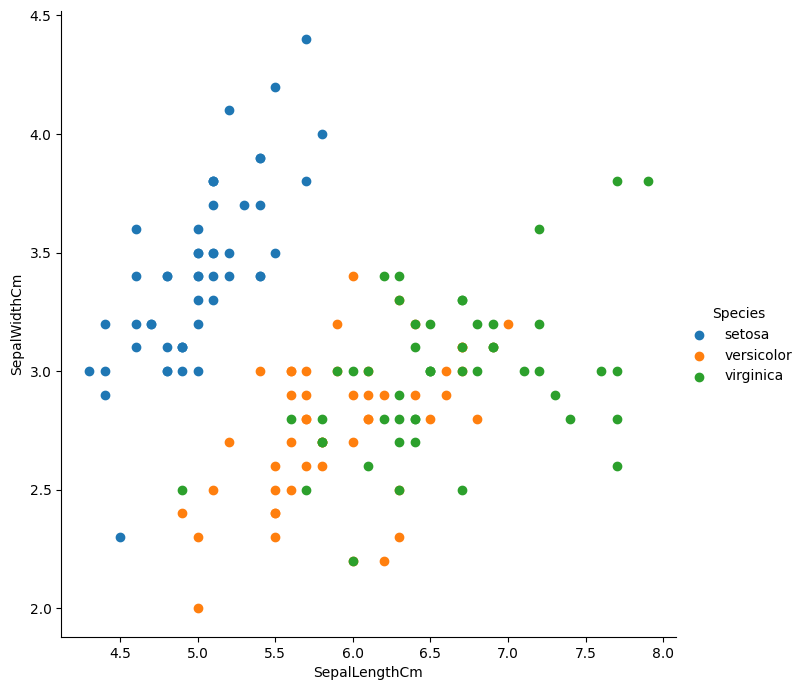

In [ ]:
sns.FacetGrid(dataFrame, hue="Species", height=7) \
  .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
  .add_legend()

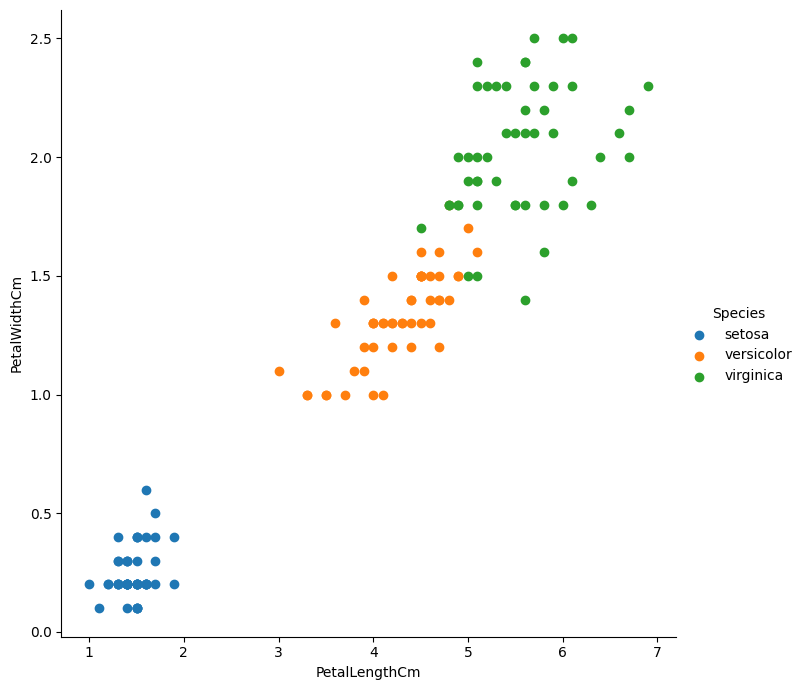

In [ ]:
sns.FacetGrid(dataFrame, hue="Species", height=7) \
  .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
  .add_legend()

In [ ]:
#prepare the training set
X = dataFrame.iloc[:, :-1]
Y = dataFrame.iloc[:, -1]

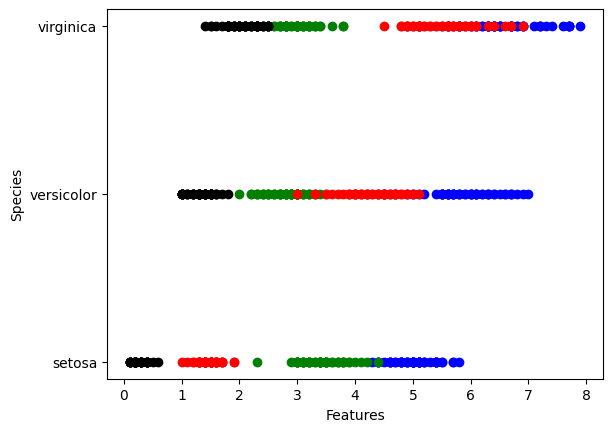

In [ ]:
#plot the relation of each features to the target
plt.xlabel("Features")
plt.ylabel("Species")

pltX = dataFrame.loc[:, "SepalLengthCm"]
pltY = dataFrame.loc[:, "Species"]
plt.scatter(pltX, pltY, color="blue", label="SepalLengthCm")

pltX = dataFrame.loc[:, "SepalWidthCm"]
pltY = dataFrame.loc[:, "Species"]
plt.scatter(pltX, pltY, color="green", label="SepalWidthCm")

pltX = dataFrame.loc[:, "PetalLengthCm"]
pltY = dataFrame.loc[:, "Species"]
plt.scatter(pltX, pltY, color="red", label="PetalLengthCm")

pltX = dataFrame.loc[:, "PetalWidthCm"]
pltY = dataFrame.loc[:, "Species"]
plt.scatter(pltX, pltY, color="black", label="PetalWidthCm")

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
test_size=0.3, random_state=0)

In [ ]:
#train the model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'setosa' 'setosa']


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [ ]:
class_names=[0,1] #name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#check precisison, recall, f1-score
print(classification_report(Y_test, Y_pred))
print("accuracy: ", accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

accuracy:  0.9777777777777777
